In [2]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [np.nan, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [5, 3, 2, 3, 2, 3, 1, 1, 4, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [24]:
df = pd.DataFrame(data, index=labels)
df

,age,animal,priority,visits
a,NaN,cat,yes,5
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,4
j,3.0,dog,no,1


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         7 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,7.000000,10.000000
mean,3.571429,2.500000
std,2.129722,1.354006
min,0.500000,1.000000
25%,2.500000,1.250000
50%,3.000000,2.500000
75%,4.750000,3.000000
max,7.000000,5.000000


In [26]:
df.head(3)

,age,animal,priority,visits
a,NaN,cat,yes,5
b,3.0,cat,yes,3
c,0.5,snake,no,2


In [27]:
df[['animal', 'age']]

,animal,age
a,cat,NaN
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [28]:
df[df['visits'] == 3]

,age,animal,priority,visits
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,2.0,cat,no,3


In [29]:
df[(df['age'] < 3) & (df['animal'] == 'cat')]

,age,animal,priority,visits
f,2.0,cat,no,3


In [30]:
df.at['f', 'age'] = 3
df

,age,animal,priority,visits
a,NaN,cat,yes,5
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,3.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,4
j,3.0,dog,no,1


In [31]:
df['age'].mean()

3.7142857142857144

In [32]:
df[['age']].apply(np.mean)

age    3.714286
dtype: float64

In [33]:
animals = df['animal'].unique()

In [34]:
for an in animals:
    avg = df[df['animal'] == an]['age'].mean()
    print(an, '\t', avg)

cat 	 3.0
snake 	 2.5
dog 	 5.0


In [35]:
df[['animal','age']].groupby('animal').mean()

,age
animal,
cat,3.0
dog,5.0
snake,2.5


In [36]:
df.groupby('animal')['age'].mean()

animal
cat      3.0
dog      5.0
snake    2.5
Name: age, dtype: float64

In [37]:
new_row = [5.5, 'dog', 'no', 3]

In [38]:
df.loc['k'] = new_row
df

,age,animal,priority,visits
a,NaN,cat,yes,5
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,3.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,4
j,3.0,dog,no,1


In [39]:
df2 = df.rename(columns={"priority": "isMajor"})
df2

,age,animal,isMajor,visits
a,NaN,cat,yes,5
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,3.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,4
j,3.0,dog,no,1


In [40]:
def transform(row):
    if row['isMajor'] == 'yes':
        return 1
    else:
        return 0

In [42]:
df2['isMajor'] = df2.apply(transform, axis=1)
df2

,age,animal,isMajor,visits
a,NaN,cat,0,5
b,3.0,cat,0,3
c,0.5,snake,0,2
d,NaN,dog,0,3
e,5.0,dog,0,2
f,3.0,cat,0,3
g,4.5,snake,0,1
h,NaN,cat,0,1
i,7.0,dog,0,4
j,3.0,dog,0,1


In [43]:
df['priority'] = df['priority'].map({'yes': 1, 'no': 0})
df = df.rename(columns={"priority": "isMajor"})
df

,age,animal,isMajor,visits
a,NaN,cat,1,5
b,3.0,cat,1,3
c,0.5,snake,0,2
d,NaN,dog,1,3
e,5.0,dog,0,2
f,3.0,cat,0,3
g,4.5,snake,0,1
h,NaN,cat,1,1
i,7.0,dog,0,4
j,3.0,dog,0,1


In [44]:
df2['age'].fillna(df2['age'].max(),inplace=True)
df2

,age,animal,isMajor,visits
a,7.0,cat,0,5
b,3.0,cat,0,3
c,0.5,snake,0,2
d,7.0,dog,0,3
e,5.0,dog,0,2
f,3.0,cat,0,3
g,4.5,snake,0,1
h,7.0,cat,0,1
i,7.0,dog,0,4
j,3.0,dog,0,1


In [46]:
df['age'].fillna(df['age'].max(),inplace=True)
df

,age,animal,isMajor,visits
a,7.0,cat,1,5
b,3.0,cat,1,3
c,0.5,snake,0,2
d,7.0,dog,1,3
e,5.0,dog,0,2
f,3.0,cat,0,3
g,4.5,snake,0,1
h,7.0,cat,1,1
i,7.0,dog,0,4
j,3.0,dog,0,1


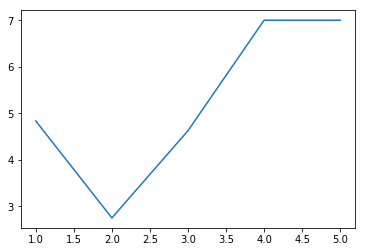

In [47]:
data = df2[['age','visits']].groupby(['visits'])['age'].mean()
plt.plot(data.index.values, data.values, label = 'средний возраст животного от количества визитов');

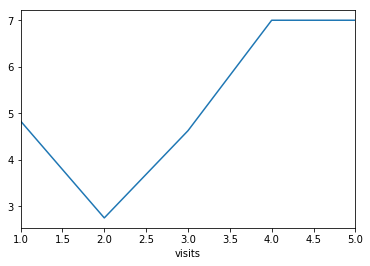

In [53]:
data = df.groupby(['visits'])['age'].mean()
data.plot();

In [58]:
df_t = pd.read_csv('../data/titanic.csv')

In [65]:
df_t.shape

(891, 12)

In [66]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [67]:
df_t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


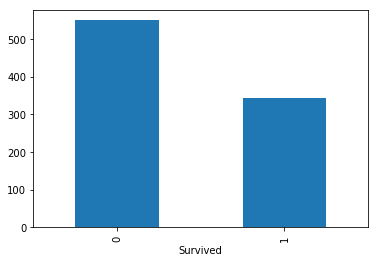

In [74]:
df_t.groupby('Survived')['PassengerId'].count().plot(kind='bar');

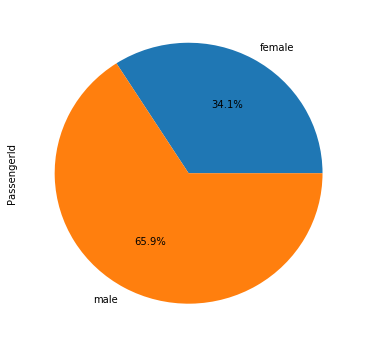

In [150]:
data = df_t.groupby(['Sex'])['PassengerId'].sum()
data.plot(figsize=(6,6), kind='pie', autopct='%1.1f%%');

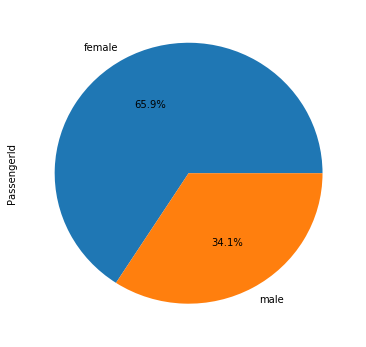

In [167]:
data = df_t[df_t['Survived'] == 1].groupby(['Sex'])['PassengerId'].sum()
data.plot(figsize=(6,6), kind='pie', autopct='%1.1f%%');

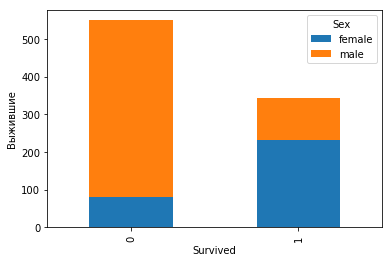

In [205]:
survived = df_t.groupby(['Survived','Sex'])['PassengerId'].count()
survived.unstack().plot(kind='bar', stacked=True, grid=False)
plt.ylabel('Выжившие');

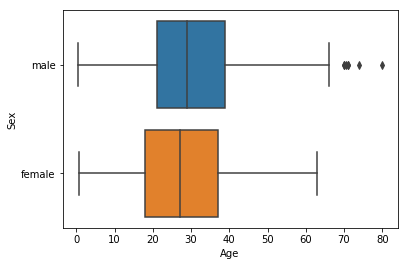

In [169]:
sns.boxplot(x="Age", y="Sex", data=df_t);

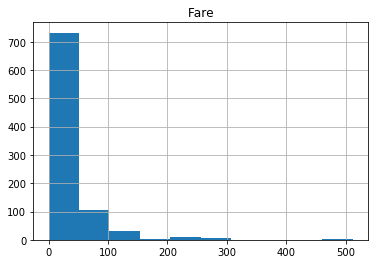

In [209]:
df_t.hist(column='Fare');

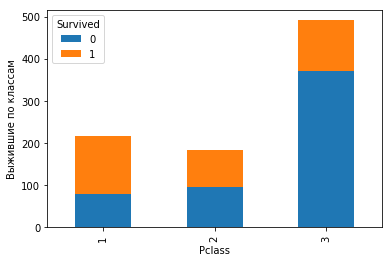

In [213]:
survived = df_t.groupby(['Pclass','Survived'])['PassengerId'].count()
survived.unstack().plot(kind='bar', stacked=True, grid=False)
plt.ylabel('Выжившие по классам');

In [3]:
df_d = pd.read_csv('../data/digit.csv')
df_d.shape

(1200, 3)

In [109]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
a    1200 non-null int64
x    1200 non-null int64
y    1200 non-null int64
dtypes: int64(3)
memory usage: 28.2 KB


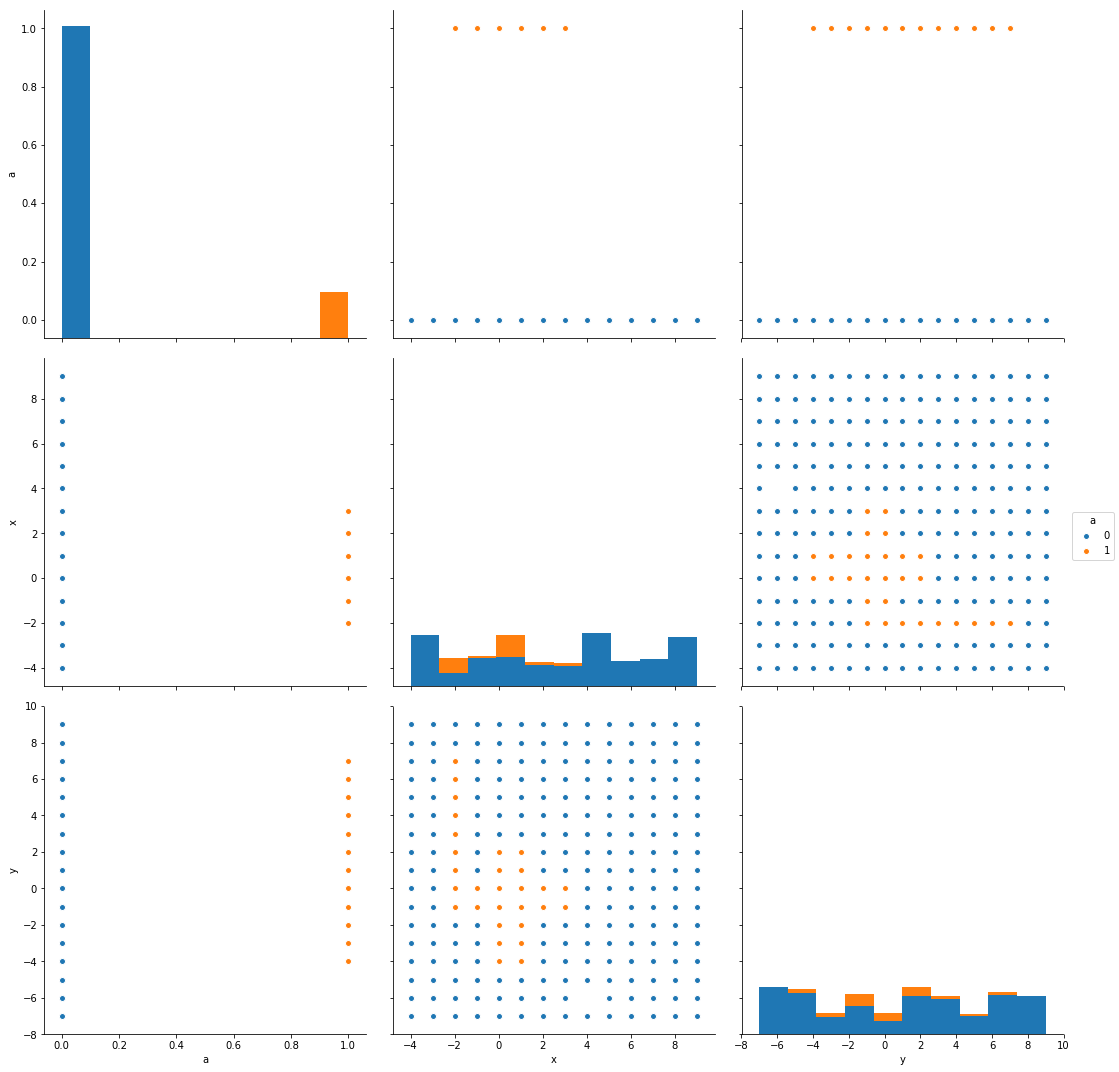

In [16]:
fg = sns.pairplot(df_d, hue='a', size=5)